In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

# EDA

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:xlabel='Gender', ylabel='count'>

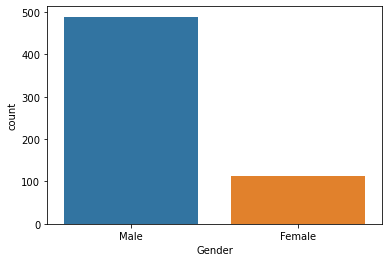

In [6]:
sb.countplot(data=data, x='Gender')

<AxesSubplot:xlabel='Married', ylabel='count'>

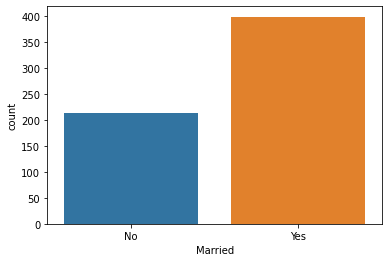

In [7]:
sb.countplot(data=data, x='Married')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

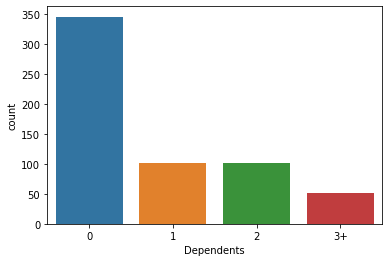

In [8]:
sb.countplot(data=data, x='Dependents')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

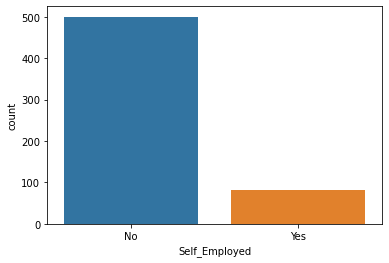

In [9]:
sb.countplot(data=data, x='Self_Employed')

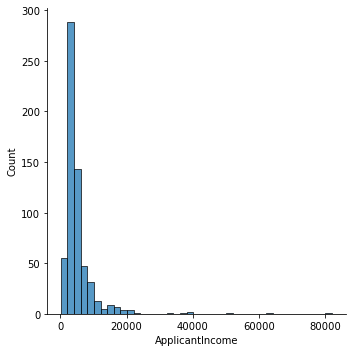

In [10]:
sb.displot(data=data, x='ApplicantIncome', binwidth=2000)

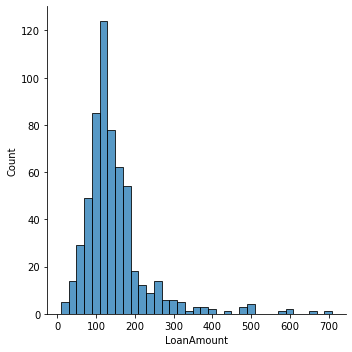

In [11]:
sb.displot(data=data, x='LoanAmount', binwidth=20)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

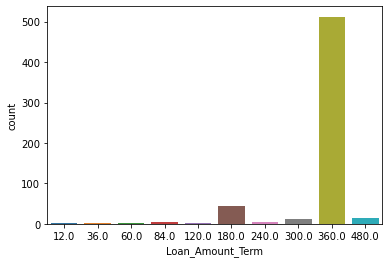

In [12]:
sb.countplot(data=data, x='Loan_Amount_Term')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

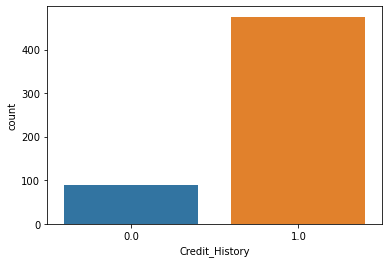

In [13]:
sb.countplot(data=data, x='Credit_History')

# Preprocessing

## Cleaning

In [14]:
data.drop('Loan_ID', axis=1, inplace=True)

## Handling missing values

In [15]:
data.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [16]:
data.fillna({
    'Credit_History': data.Credit_History.mode()[0],
    'Self_Employed': data.Dependents.mode()[0],
    'LoanAmount': data.LoanAmount.median(),
    'Dependents': data.Dependents.mode()[0],
    'Loan_Amount_Term': data.Loan_Amount_Term.mode()[0],
    'Gender': data.Gender.mode()[0],
    'Married': data.Married.mode()[0]
}, inplace=True)

## Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

gender_le = LabelEncoder()
data.Gender = gender_le.fit_transform(data.Gender)
married_le = LabelEncoder()
data.Married = married_le.fit_transform(data.Married)
dependents_le = LabelEncoder()
data.Dependents = dependents_le.fit_transform(data.Dependents)
education_le = LabelEncoder()
data.Education = education_le.fit_transform(data.Education)
self_employed_le = LabelEncoder()
data.Self_Employed = self_employed_le.fit_transform(data.Self_Employed)
property_area_le = LabelEncoder()
data.Property_Area = property_area_le.fit_transform(data.Property_Area)
loan_status_le = LabelEncoder()
data.Loan_Status = loan_status_le.fit_transform(data.Loan_Status)

# Modeling

In [18]:
from sklearn.model_selection import train_test_split

X = data.drop('Loan_Status', axis=1)
y = data.Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
print("Decision tree depth :", dt_cls.get_depth())
print("Decision tree number of leaves :", dt_cls.get_n_leaves())

Decision tree depth : 18
Decision tree number of leaves : 95


In [21]:
from sklearn.metrics import accuracy_score, f1_score

y_train_pred = dt_cls.predict(X_train)
y_test_pred = dt_cls.predict(X_test)

dt_acc = accuracy_score(y_test, y_test_pred)
dt_f1 = f1_score(y_test, y_test_pred)
print("Decision tree cls accuracy on test set : {} (on train set : {})".format(dt_acc, accuracy_score(y_train, y_train_pred)))
print("Decision tree cls F1 score on test set : {} (on train set : {})".format(dt_f1, f1_score(y_train, y_train_pred)))

Decision tree cls accuracy on test set : 0.6829268292682927 (on train set : 1.0)
Decision tree cls F1 score on test set : 0.7577639751552795 (on train set : 1.0)


#### Results

We notice a perfect fit on the training set with a pretty big drop in performance on the test set indicating we are probably overfitting the training set.  
That is a common issue with decision trees mainly solved by fine-tuning the hyperparameters of our decision tree or switching to random forest.

### Decision tree : hyperparameters tuning with CV

In [22]:
from sklearn.model_selection import GridSearchCV

dt_estimator = DecisionTreeClassifier(random_state=42)
grid_search_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': range(1, 10)
}
cv_dt_model = GridSearchCV(estimator=dt_estimator, param_grid=grid_search_params)
cv_dt_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'splitter': ['best', 'random']})

In [23]:
print("Best depth :", cv_dt_model.best_estimator_.get_depth())
print("Best number of leaves :", cv_dt_model.best_estimator_.get_n_leaves())
print("Best params :", cv_dt_model.best_estimator_.get_params())

Best depth : 1
Best number of leaves : 2
Best params : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}


In [24]:
y_train_pred = cv_dt_model.predict(X_train)
y_test_pred = cv_dt_model.predict(X_test)

cv_dt_acc = accuracy_score(y_test, y_test_pred)
cv_dt_f1 = f1_score(y_test, y_test_pred)
print("Optimized decision tree cls accuracy on test set : {} (on train set : {})".format(cv_dt_acc, accuracy_score(y_train, y_train_pred)))
print("Optimized decision tree cls F1 score on test set : {} (on train set : {})".format(cv_dt_f1, f1_score(y_train, y_train_pred)))

Optimized decision tree cls accuracy on test set : 0.7886178861788617 (on train set : 0.814663951120163)
Optimized decision tree cls F1 score on test set : 0.8586956521739131 (on train set : 0.8807339449541285)


#### Results

So our optimized decision tree does indeed perform better on the test set than our previous decision tree indicating we may have reduced overfitting.  
**But we notice that cross-validation led to a weird discovery : our best tree has only a depth of 1 and 2 leaves !**

### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier(criterion='entropy', random_state=42)
rf_cls.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [26]:
y_train_pred = rf_cls.predict(X_train)
y_test_pred = rf_cls.predict(X_test)

rf_acc = accuracy_score(y_test, y_test_pred)
rf_f1 = f1_score(y_test, y_test_pred)
print("Random Forest cls accuracy on test set : {} (on train set : {})".format(rf_acc, accuracy_score(y_train, y_train_pred)))
print("Random Forest cls F1 score on test set : {} (on train set : {})".format(rf_f1, f1_score(y_train, y_train_pred)))

Random Forest cls accuracy on test set : 0.7723577235772358 (on train set : 1.0)
Random Forest cls F1 score on test set : 0.8461538461538461 (on train set : 1.0)


#### Results

We're once again fitting the training set perfectly but our evaluation metrics improved compared to our simple decision tree.

### Explainability : feature importances

Let's try to understand how our models made their predictions, especially our optimized decision tree with only 2 leaves.

<AxesSubplot:xlabel='value', ylabel='feature'>

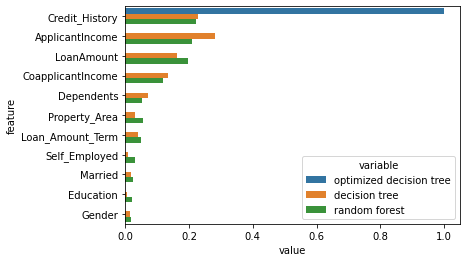

In [27]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'decision tree': dt_cls.feature_importances_,
    'optimized decision tree': cv_dt_model.best_estimator_.feature_importances_,
    'random forest': rf_cls.feature_importances_
})

feature_importances_melted = feature_importances.melt(id_vars='feature', value_vars=feature_importances.columns.values[1:])
feature_importances_melted.sort_values(by='value', ascending=False, inplace=True)

sb.barplot(data=feature_importances_melted, y='feature', x='value', hue='variable')

As we could have guessed, *that* is the reason why our optimized decision tree has only 2 leaves : it makes all its predictions around **one single feature** !\
Interestingly enough, this feature (the credit history of the applicant) is also the most important one for our random forest but not for our simple decision tree.

### Correlation matrix

Correlation matrices allow us to check for correlation between our features and help us foresee such outcomes.  
Inspecting correlation matrices is usually part of EDA and it was my mistake not to do it in the first place.

<AxesSubplot:>

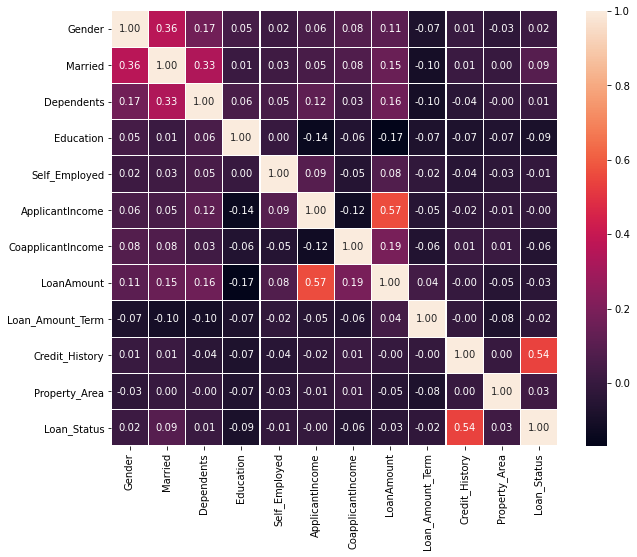

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sb.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.1, ax=ax)

As expected, our target variable Loan_Status has a high (>.5) positive Pearson correlation coefficient with Credit_History.

# Conclusion

#### Final results (on test set)

In [29]:
from tabulate import tabulate

print(tabulate([
    ['Decision tree', round(dt_acc, 2), round(dt_f1, 2)],
    ['Optimized DT', round(cv_dt_acc, 2), round(cv_dt_f1, 2)],
    ['Random forest', round(rf_acc, 2), round(rf_f1, 2)]],
    headers=['Model', 'Accuracy', 'F1 score']))

Model            Accuracy    F1 score
-------------  ----------  ----------
Decision tree        0.68        0.76
Optimized DT         0.79        0.86
Random forest        0.77        0.85


Our optimized decision tree revolving solely around the credit history feature ends up achieving the best performance.